In [6]:
import keras 
from keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils import np_utils

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

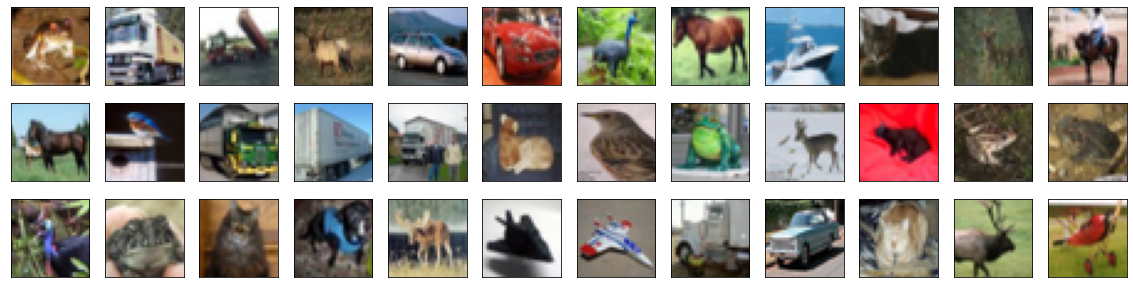

In [8]:

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [9]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [11]:
# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [14]:
(x_train, x_valid) = x_train[6000:], x_train[:6000]
(y_train, y_valid) = y_train[6000:], y_train[:6000]

In [15]:
x_train.shape, y_train.shape

((39000, 32, 32, 3), (39000, 10))

In [16]:
x_valid.shape, y_valid.shape

((6000, 32, 32, 3), (6000, 10))

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 64)         

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [20]:
from keras.callbacks import ModelCheckpoint   

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=256, epochs=100,
                validation_data=(x_valid, y_valid), 
                callbacks=[checkpointer], verbose=2, shuffle=True)

Epoch 1/100
153/153 - 6s - loss: 1.9443 - accuracy: 0.2995 - val_loss: 1.6780 - val_accuracy: 0.3790

Epoch 00001: val_loss improved from inf to 1.67802, saving model to model.weights.best.hdf5
Epoch 2/100
153/153 - 1s - loss: 1.6385 - accuracy: 0.4163 - val_loss: 1.4621 - val_accuracy: 0.4747

Epoch 00002: val_loss improved from 1.67802 to 1.46209, saving model to model.weights.best.hdf5
Epoch 3/100
153/153 - 1s - loss: 1.4933 - accuracy: 0.4661 - val_loss: 1.4652 - val_accuracy: 0.4573

Epoch 00003: val_loss did not improve from 1.46209
Epoch 4/100
153/153 - 1s - loss: 1.4045 - accuracy: 0.5006 - val_loss: 1.4323 - val_accuracy: 0.4953

Epoch 00004: val_loss improved from 1.46209 to 1.43225, saving model to model.weights.best.hdf5
Epoch 5/100
153/153 - 1s - loss: 1.3319 - accuracy: 0.5263 - val_loss: 1.2134 - val_accuracy: 0.5660

Epoch 00005: val_loss improved from 1.43225 to 1.21339, saving model to model.weights.best.hdf5
Epoch 6/100
153/153 - 1s - loss: 1.2748 - accuracy: 0.5461 

153/153 - 1s - loss: 0.6238 - accuracy: 0.7797 - val_loss: 0.7585 - val_accuracy: 0.7362

Epoch 00049: val_loss did not improve from 0.75528
Epoch 50/100
153/153 - 1s - loss: 0.6121 - accuracy: 0.7826 - val_loss: 0.7700 - val_accuracy: 0.7328

Epoch 00050: val_loss did not improve from 0.75528
Epoch 51/100
153/153 - 1s - loss: 0.6125 - accuracy: 0.7825 - val_loss: 0.7912 - val_accuracy: 0.7268

Epoch 00051: val_loss did not improve from 0.75528
Epoch 52/100
153/153 - 1s - loss: 0.6037 - accuracy: 0.7880 - val_loss: 0.7962 - val_accuracy: 0.7240

Epoch 00052: val_loss did not improve from 0.75528
Epoch 53/100
153/153 - 1s - loss: 0.6053 - accuracy: 0.7874 - val_loss: 0.7913 - val_accuracy: 0.7288

Epoch 00053: val_loss did not improve from 0.75528
Epoch 54/100
153/153 - 1s - loss: 0.5895 - accuracy: 0.7914 - val_loss: 0.7469 - val_accuracy: 0.7398

Epoch 00054: val_loss improved from 0.75528 to 0.74688, saving model to model.weights.best.hdf5
Epoch 55/100
153/153 - 1s - loss: 0.5917 - a

In [21]:
model.load_weights('model.weights.best.hdf5')

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print( 'Test accuracy:', score[1])

Test accuracy: 0.744700014591217


In [23]:
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

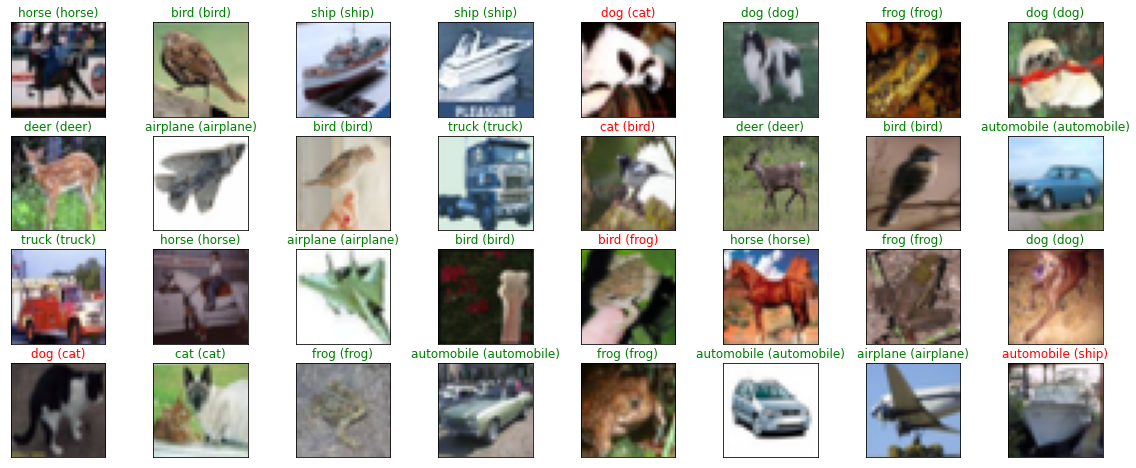

In [24]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))